# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [2]:
# your answer here
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [3]:
# your answer here
employee = pd.read_csv(r'C:\Users\zluca\OneDrive\LAURA\Ironhack - data analyst\GitHub\week 10\lab-pivot-table-correlation\your_code\data\Employee.csv')

In [4]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [5]:
# Method 1
employee.groupby('Department')['Salary'].mean()


Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [6]:
# Method 2
employee.pivot_table(index='Department', values='Salary')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [7]:
# your answer here
employee.pivot_table(index=['Department', 'Title'], values='Salary')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [8]:
# your answer here
employee.pivot_table(index=['Department', 'Title'], columns='Years', values='Salary')

Years                    1     2     3     4     7     8
Department Title                                        
HR         VP          NaN   NaN   NaN   NaN   NaN  70.0
           analyst     NaN  30.0   NaN  35.0   NaN   NaN
IT         VP          NaN   NaN   NaN   NaN   NaN  70.0
           analyst    35.0  30.0   NaN   NaN   NaN   NaN
           associate   NaN   NaN   NaN   NaN  60.0   NaN
Sales      associate   NaN  55.0  55.0   NaN   NaN   NaN

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [9]:
# your answer here
filtered_employee = employee.groupby(['Department', 'Title']).agg({'Salary':'mean', 'Title': 'count'})
filtered_employee.rename(columns={'Salary':'mean Salary', 'Title': 'count of employees'})

mean Salary  count of employees
Department Title                                     
HR         VP                70.0                   1
           analyst           32.5                   2
IT         VP                70.0                   1
           analyst           32.5                   2
           associate         60.0                   1
Sales      associate         55.0                   2

In [10]:
# by pivoting
employee.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc=['mean', 'count'])

mean  count
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1
Sales      associate   55.0      2

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [11]:
# your answer here
employee.groupby(['Department', 'Title'])['Salary'].describe()

count  mean       std   min    25%   50%    75%   max
Department Title                                                           
HR         VP           1.0  70.0       NaN  70.0  70.00  70.0  70.00  70.0
           analyst      2.0  32.5  3.535534  30.0  31.25  32.5  33.75  35.0
IT         VP           1.0  70.0       NaN  70.0  70.00  70.0  70.00  70.0
           analyst      2.0  32.5  3.535534  30.0  31.25  32.5  33.75  35.0
           associate    1.0  60.0       NaN  60.0  60.00  60.0  60.00  60.0
Sales      associate    2.0  55.0  0.000000  55.0  55.00  55.0  55.00  55.0

In [12]:
employee.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc=['describe'])

describe                                               
                          25%   50%    75% count   max  mean   min       std
Department Title                                                            
HR         VP           70.00  70.0  70.00   1.0  70.0  70.0  70.0       NaN
           analyst      31.25  32.5  33.75   2.0  35.0  32.5  30.0  3.535534
IT         VP           70.00  70.0  70.00   1.0  70.0  70.0  70.0       NaN
           analyst      31.25  32.5  33.75   2.0  35.0  32.5  30.0  3.535534
           associate    60.00  60.0  60.00   1.0  60.0  60.0  60.0       NaN
Sales      associate    55.00  55.0  55.00   2.0  55.0  55.0  55.0  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [13]:
# The missing values are the standard deviation for professional roles represented by one individual. So I would fill the nans with 0, because there is no deviation in this case.
employee.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc=['describe']).fillna(0)

describe                                               
                          25%   50%    75% count   max  mean   min       std
Department Title                                                            
HR         VP           70.00  70.0  70.00   1.0  70.0  70.0  70.0  0.000000
           analyst      31.25  32.5  33.75   2.0  35.0  32.5  30.0  3.535534
IT         VP           70.00  70.0  70.00   1.0  70.0  70.0  70.0  0.000000
           analyst      31.25  32.5  33.75   2.0  35.0  32.5  30.0  3.535534
           associate    60.00  60.0  60.00   1.0  60.0  60.0  60.0  0.000000
Sales      associate    55.00  55.0  55.00   2.0  55.0  55.0  55.0  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [14]:
# your answer here
employee.pivot_table(index='Department', values='Salary', aggfunc=['sum', 'count'])

,sum,count
,Salary,Salary
Department,,
HR,135,3
IT,195,4
Sales,110,2


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [15]:
# your answer here
employee.pivot_table(index=['Department', 'Title'], values=['Years', 'Salary'], aggfunc={'Years':'sum', 'Salary':'mean'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [16]:
# your answer here
def compute_mean_salary(df):
  max_salaries = df.groupby('Department')['Salary'].max()
  filtered_df = df[~df.apply(lambda row: row['Salary'] == max_salaries[row['Department']], axis=1)]
  filtered_df = filtered_df.pivot_table(index='Department', values='Salary')
  return filtered_df


In [17]:
compute_mean_salary(employee)

,Salary
Department,
HR,32.500000
IT,41.666667


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [18]:
# your answer here
fitbit = pd.read_csv(r'C:\Users\zluca\OneDrive\LAURA\Ironhack - data analyst\GitHub\week 10\lab-pivot-table-correlation\your_code\data\Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [19]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [20]:
# your answer here
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes'],
      dtype='object')

In [21]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [23]:
# your answer here
correlation = fitbit['Minutes Very Active'].corr(fitbit['Steps'], method='pearson')
correlation

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

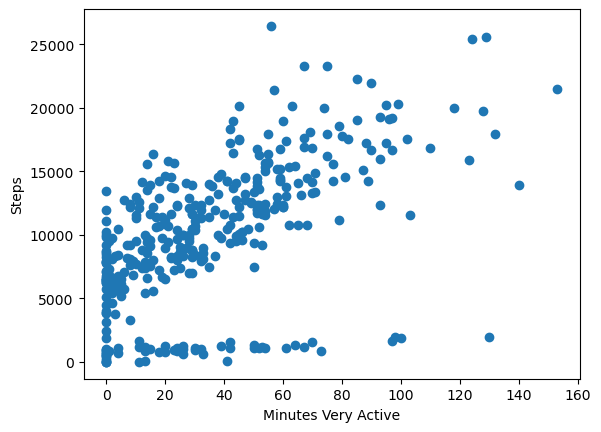

In [24]:
# your answer here
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [25]:
# There seems to be a linear positive relationship between the two variables.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [26]:
# your answer here
correlation = fitbit['Minutes Sedentary'].corr(fitbit['Steps'], method='pearson')
correlation

0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

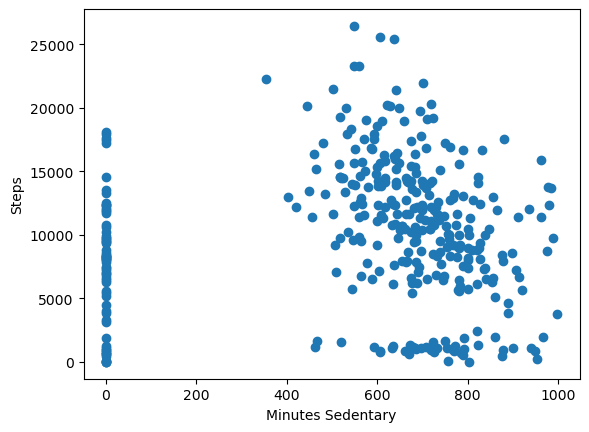

In [27]:
# your answer here
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

In [28]:
# In this case, I would say there is no correlation betwwen Minutes Sedentary and Steps. 
# The correlation value is very close to 0 and the scatterplot does not show that the values could be nicely fitted by a linear regression model. 

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [29]:
# your answer here
correlation = fitbit['MinutesOfSleep'].corr(fitbit['Steps'], method='pearson')
correlation

0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

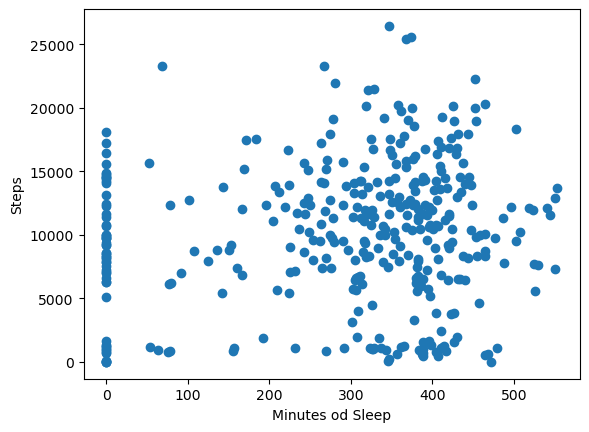

In [30]:
# your answer here
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])
plt.xlabel('Minutes od Sleep')
plt.ylabel('Steps')
plt.show()

In [31]:
# Also in this case, for the same reasons for Minutes Sedentary, I do not see a correlation between the variables MinutesOfSleep and Steps.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [32]:
# your answer here
columns= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
filtered_fitbit = fitbit[columns]
filtered_fitbit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407
...,...,...,...,...,...,...
362,3796,18588,16,599.000,79,377
363,3525,16382,16,684.000,55,406
364,3649,21913,19,701.000,90,280
365,3539,19023,15,575.000,85,370


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [33]:
# your answer here
filtered_fitbit.sort_values(by='Steps', ascending=False)
filtered_fitbit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407
...,...,...,...,...,...,...
362,3796,18588,16,599.000,79,377
363,3525,16382,16,684.000,55,406
364,3649,21913,19,701.000,90,280
365,3539,19023,15,575.000,85,370


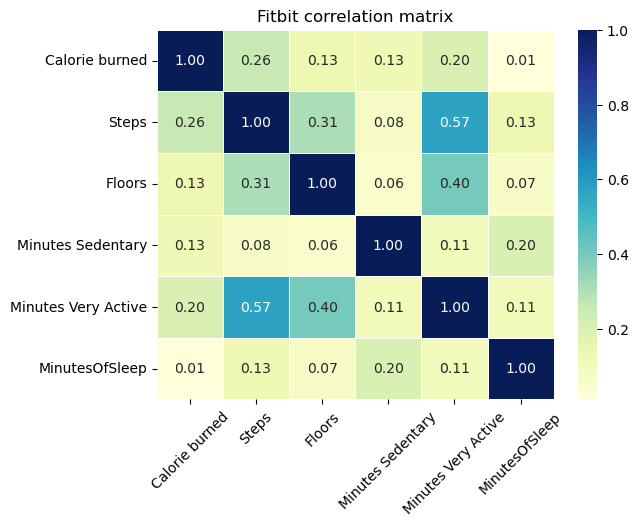

In [34]:
sns.heatmap(data=filtered_fitbit.corr(), annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Fitbit correlation matrix')
plt.xticks(rotation=45)
plt.show()

In [35]:
# The highest correlations with the variable Steps can be traced to the variables Minutes Very Active and Floors (though the correlation value is not particularly high).

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [36]:
# your answer here
time_grades = pd.read_csv(r'C:\Users\zluca\OneDrive\LAURA\Ironhack - data analyst\GitHub\week 10\lab-pivot-table-correlation\your_code\data\Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


In [60]:
time_grades.sort_values(by='Study time')

,Name,Study time,Grade
12,Jonathan,2,1
14,Pilar,3,2
0,Jose,4,4
5,Eva,5,3
7,Pedro,6,5
9,Gervasio,7,3
10,Gemma,7,8
2,David,8,9
1,Maria,9,7
3,Sonia,10,7


In [71]:
time_grades['Grade'].value_counts()

7    4
9    3
3    2
8    2
4    1
5    1
1    1
2    1
Name: Grade, dtype: int64

#### Show visually the frequency distribution of the time_grades dataset.

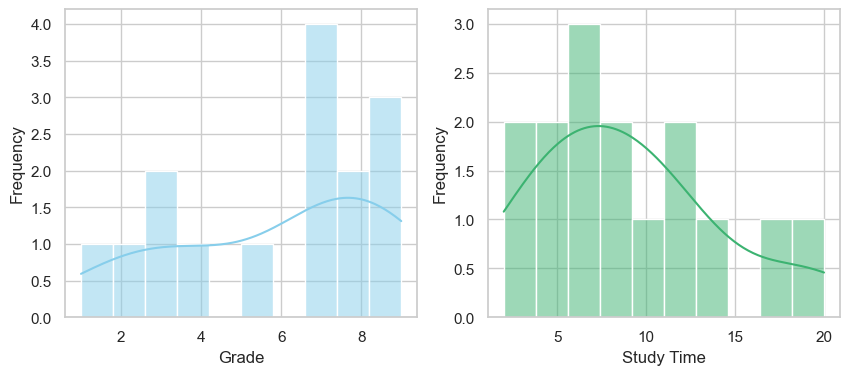

In [87]:
# I am not sure this is what I need to plot...
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.histplot(data=time_grades, x='Grade', bins=10, kde=True, color='skyblue', ax=axes[0])
axes[0].set_xlabel('Grade')
axes[0].set_ylabel('Frequency')

sns.histplot(data=time_grades, x='Study time', bins=10, kde=True, color='mediumseagreen', ax=axes[1])
axes[1].set_xlabel('Study Time')
axes[1].set_ylabel('Frequency')

plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [39]:
# your answer here
time_grades['Grade'].corr(time_grades['Study time'], method='pearson')

0.7980456073578858

In [40]:
time_grades['Grade'].corr(time_grades['Study time'], method='spearman')

0.819658753036942

In [ ]:
# The result show that there is a high positive correlation between Study time and Grade.

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

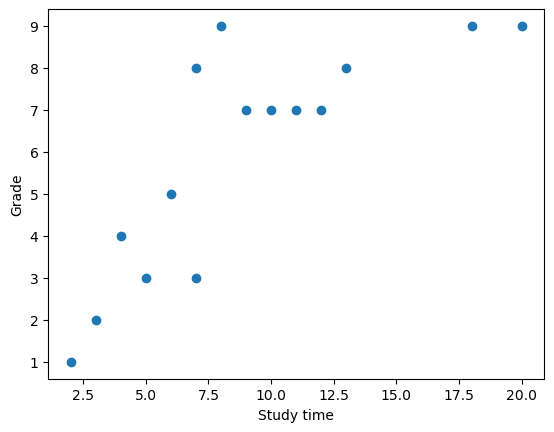

In [41]:
# your answer here
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.show()

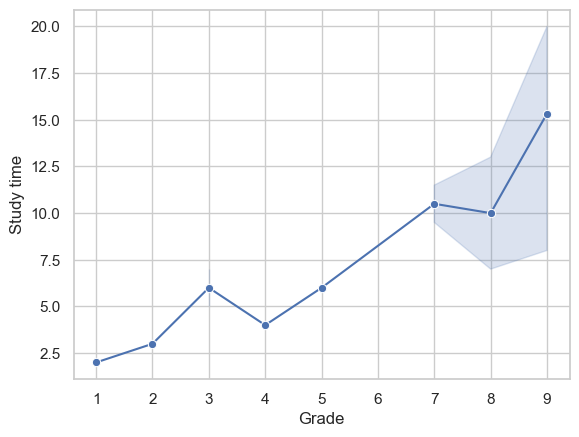

In [68]:
sns.lineplot(x=time_grades['Grade'], y=time_grades['Study time'], marker='o')
plt.show()

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# The methods differ because they capture different types of correlation. Pearson method is sueted to measure a linear relationship between two continuous variables when their distribution is normal.
# Spearman correlation does not work only for normally distributed variables and does not interpret the correlation as linear. It is a method less sensitive to outliers, but captures linear relationship with less precision.